In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
from keras.models import Sequential
from keras import preprocessing

2023-01-25 12:33:07.196999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 12:33:07.456468: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 12:33:07.456511: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 12:33:09.438862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-2

In [2]:
# Task 1
mnist = pd.read_csv('/home/Stoliarchuk/fashion-mnist_train.csv')
x_train = mnist.drop('label',axis=1)
x_train=x_train.values
x_train=x_train.reshape(-1,28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


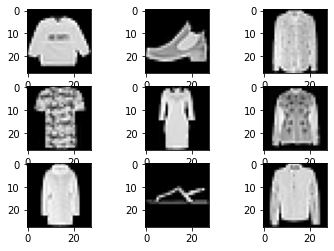

In [3]:
fig,axe=plt.subplots(3,3)
idx = 0
for i in range(3):
    for j in range(3):
        axe[i,j].imshow(x_train[idx].reshape(28,28),cmap='gray')
        idx+=1

2023-01-25 12:33:29.636724: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-25 12:33:29.636790: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 12:33:29.636820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kali): /proc/driver/nvidia/version does not exist
2023-01-25 12:33:29.637436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1
1/1 [==============================] - 0s 307ms/step


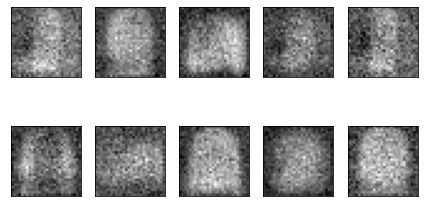

Epoch 2


KeyboardInterrupt: 

In [4]:
x_train = x_train.astype('float32')
x_train = x_train/255
x_train = x_train*2 - 1.
model_generator = Sequential()
model_generator.add(Dense(512,input_shape=[100]))
model_generator.add(LeakyReLU(alpha=0.2))
model_generator.add(BatchNormalization(momentum=0.8))
model_generator.add(Dense(256))
model_generator.add(LeakyReLU(alpha=0.2))
model_generator.add(BatchNormalization(momentum=0.8))
model_generator.add(Dense(128))
model_generator.add(LeakyReLU(alpha=0.2))
model_generator.add(BatchNormalization(momentum=0.8))
model_generator.add(Dense(784))
model_generator.add(Reshape([28,28,1]))
model_discriminator = Sequential()
model_discriminator.add(Dense(1,input_shape=[28,28,1]))
model_discriminator.add(Flatten())
model_discriminator.add(Dense(256))
model_discriminator.add(LeakyReLU(alpha=0.2))
model_discriminator.add(Dropout(0.5))
model_discriminator.add(Dense(128))
model_discriminator.add(LeakyReLU(alpha=0.2))
model_discriminator.add(Dropout(0.5))
model_discriminator.add(Dense(64))
model_discriminator.add(LeakyReLU(alpha=0.2))
model_discriminator.add(Dropout(0.5))
model_discriminator.add(Dense(1,activation='sigmoid'))
GAN =Sequential([model_generator,model_discriminator])
model_discriminator.compile(optimizer='adam',loss='binary_crossentropy')
model_discriminator.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')
epochs = 40
batch_size = 64
noise_shape=100
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    for i in range(x_train.shape[0]//batch_size):  
        noise=np.random.normal(0, 1, size=[batch_size,noise_shape])  
        generate_image = model_generator.predict_on_batch(noise)   
        train_dataset = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        train_label=np.ones(shape=(batch_size,1))
        model_discriminator.trainable = True
        d_loss_real=model_discriminator.train_on_batch(train_dataset,train_label)
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=model_discriminator.train_on_batch(generate_image,train_label)
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        model_discriminator.trainable = False
        d_g_loss_batch = GAN.train_on_batch(noise, train_label)        
    if epoch % 10 == 0:
        samples = 10
        x_fake = model_generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))
        for n in range(samples):
            plt.subplot(2, 5, n+1)
            plt.imshow(x_fake[n].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()        
noise=np.random.normal(size=[10,noise_shape])
generate_image = model_generator.predict(noise)

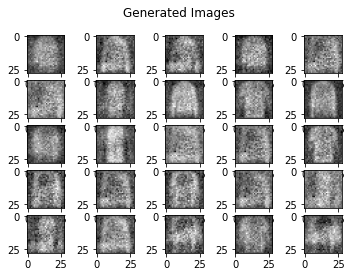

In [5]:
fig,axe=plt.subplots(5,5)
fig.suptitle('Generated Images')
idx=0
for i in range(5):
    for j in range(5):
         axe[i,j].imshow(generate_image[idx],cmap='gray')
         idx+=1

In [6]:
import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [9]:
# Task 2
#parsing the data
text_file = "/home/Stoliarchuk/heb.txt"
with open(text_file) as f:
    lines = f.read().split("\n")[:-1]
text_pairs = []
for line in lines:
    eng, heb, addition = line.split("\t")
    heb = "[start] " + heb + " [end]"
    text_pairs.append((eng, heb))
for _ in range(100):
    print(random.choice(text_pairs))

('Please speak English.', '[start] דבר אנגלית בבקשה. [end]')
('His plane leaves for Hong Kong at 2:00 p.m.', '[start] המטוס שלו יוצא להונג קונג ב-2:00 אחה"צ. [end]')
('Most of the work is performed by robots.', '[start] רוב העבודה נעשית על ידי רובוטים. [end]')
("Tom's situation is different.", '[start] מצבו של תום שונה. [end]')
("It's really infuriating.", '[start] זה ממש מרגיז. [end]')
("I'm a tennis player.", '[start] אני טניסאית. [end]')
('Well done.', '[start] יפה עשיתם. [end]')
('The sky became darker and darker.', '[start] השמיים האפילו. [end]')
('Why are you protesting against the government?', '[start] למה אתה מפגין נגד הממשלה? [end]')
("My friend's condition is very serious.", '[start] המצב של חבר שלי חמור מאוד. [end]')
("Don't litter!", '[start] לא ללכלך! [end]')
('How many people were killed in the store?', '[start] כמה אנשים נהרגו בחנות? [end]')
('Drop the knife!', '[start] תפיל את הסכין! [end]')
('The driver is deeply attached to his old car.', '[start] הנהג קשור בנימי נפש

In [11]:
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]
print(f"{len(text_pairs)} total pairs")
print(f"{len(test_pairs)} test pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")

127293 total pairs
19093 test pairs
89107 training pairs
19093 validation pairs


In [14]:
#vectorizing the text data
strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")
vocab_size = 15000
sequence_length = 20
batch_size = 64
def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")
eng_vectorization = TextVectorization(
    max_tokens=vocab_size, output_mode="int", output_sequence_length=sequence_length,
)
heb_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
)
train_eng_texts = [pair[0] for pair in train_pairs]
train_heb_texts = [pair[1] for pair in train_pairs]
eng_vectorization.adapt(train_eng_texts)
heb_vectorization.adapt(train_heb_texts)
#format dataset
def format_dataset(eng, heb):
    eng = eng_vectorization(eng)
    heb = heb_vectorization(heb)
    return ({"encoder_inputs": eng, "decoder_inputs": heb[:, :-1],}, heb[:, 1:])
def make_dataset(pairs):
    eng_texts, heb_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    heb_texts = list(heb_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, heb_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()
train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 20)
inputs["decoder_inputs"].shape: (64, 20)
targets.shape: (64, 20)


2023-01-25 12:40:52.966800: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [15]:
#building the model
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True
    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions
    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True
    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)
        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)
    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)
#assemble the end-to-end model.
embed_dim = 256
latent_dim = 2048
num_heads = 8
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)
decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)
#training model
epochs = 100
transformer.summary()
transformer.compile(
    "rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
transformer.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding (Position  (None, None, 256)   3845120     ['encoder_inputs[0][0]']         
 alEmbedding)                                                                                     
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 transformer_encoder (Transform  (None, None, 256)   3155456     ['positional_embedding[

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/transformer/transformer_encoder/multi_head_attention/softmax/add/BroadcastGradientArgs' defined at (most recent call last):
    File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/kali/.local/lib/python3.9/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.9/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 418, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/kali/.local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 530, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_252354/2070808759.py", line 121, in <module>
      transformer.fit(train_ds, epochs=epochs, validation_data=val_ds)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/transformer/transformer_encoder/multi_head_attention/softmax/add/BroadcastGradientArgs'
Incompatible shapes: [64,8,20,20] vs. [64,64,20,20]
	 [[{{node gradient_tape/transformer/transformer_encoder/multi_head_attention/softmax/add/BroadcastGradientArgs}}]] [Op:__inference_train_function_78626]

In [16]:
heb_vocab = heb_vectorization.get_vocabulary()
heb_index_lookup = dict(zip(range(len(heb_vocab)), heb_vocab))
max_decoded_sentence_length = 20


def decode_sequence(input_sentence):
    tokenized_input_sentence = eng_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = heb_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = heb_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
            break
    return decoded_sentence


test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(30):
    input_sentence = random.choice(test_eng_texts)
    #translated = decode_sequence(input_sentence)
